In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
from itertools import cycle
from mpl_toolkits.mplot3d import Axes3D
colors = 'bgrcmykbgrcmykbgrcmykbgrcmyk'

In [2]:
sample_size=2000
def make_dataset(class_num,sample_num=sample_size,dimsions=3):
    matrix=np.zeros((sample_num,dimsions))
    label=[]
    x_mean=np.random.randint(10,size=class_num)
    y_mean=np.random.randint(10,size=class_num)
    z_mean=np.random.randint(10,size=class_num)
    print(x_mean)
    for i in np.arange(sample_num):
        class_type=np.random.randint(class_num)
        #print(class_type)
        gene=np.random.multivariate_normal((x_mean[class_type],y_mean[class_type],z_mean[class_type]),cov=np.identity(dimsions),)
        for ide in np.arange(dimsions):
            matrix[i][ide]=gene[ide]
        #atrix[i][dimsions]=class_type
        label.append(class_type)
    return matrix,label
data,label=make_dataset(3)
#print(label)


[8 0 0]


生成n个类别

In [3]:
def draw_distribution(matrix_show,label_show,color=colors):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    for item in np.arange(len(matrix_show)):
        #print(item)
        xs=matrix_show[item][0]
        ys=matrix_show[item][1]
        zs=matrix_show[item][2]
        #print(len(colors))
        #print(label_show)
        #print(np.int(label_show[item]))
        c=color[np.int(label_show[item])]
        #print(c)
        ax.scatter(xs, ys, zs, c=c, marker='o')

维护一个距离的mat

In [4]:
def distance_cal(a,b,dimsion=3):
    sum_col=0
    for i in np.arange(dimsion):
        sum_col+=(a[i]-b[i])**2 
    return sum_col

In [5]:
import copy
def cal_matrix(matrix):
    distance_mat=np.zeros((len(matrix),len(matrix)))
    for i in np.arange(len(matrix)):
        for j in range(i+1,len(matrix)):
            distance_mat[i][j]=distance_cal(matrix[i],matrix[j],)
            distance_mat[j][i]=distance_cal(matrix[i],matrix[j],)
    for i in np.arange(len(matrix)):
        distance_mat[i][i]=np.inf
    return distance_mat
distance=cal_matrix(data)
#distance_max=cal_matrix(data)
#label_max=copy.copy(label)

In [6]:

def indmin_matrix(M):
    '''得到矩阵M中最小元素的行列坐标'''
    row,col = divmod(np.argmin(M), np.shape(M)[1])
    return row,col

C:\Users\32068\AppData\Local\Temp/ipykernel_20312/2335485301.py:12: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  c=color[np.int(label_show[item])]


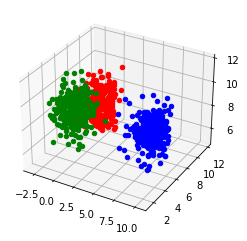

In [7]:
draw_distribution(data,label)

In [8]:
label_set_before=np.empty(sample_size)
for item in np.arange(sample_size):
    label_set_before[item]=np.inf

In [9]:
class cluster_type:
    def __init__(self,list_num,type_c):
        self.list_num=list_num
        self.leng=len(list_num)
        self.type_cluster=type_c
        self.label_appended=[]
    #def append_item(num_list):
    #    self.list.append_item
    def merge(self,another_cluster):
        for item in another_cluster.list_num:
            self.list_num.append(item)
        self.label_appended.append(another_cluster.type_cluster)
        self.leng=self.leng+another_cluster.leng
    def append(self,num):
        self.list_num.append(num)
        self.leng+=1

    

In [10]:

def get_index_of_cluster(num_in,clu_lis):
    if clu_lis ==[]:
        return None
    for i in np.arange(len(clu_lis)):
        if num_in in clu_lis[i].list_num: 
            #print("IN dict %s".format(i))
            return i
    return None

使用  最短距离 / 单连接，选取最小化的行，列

In [11]:

import copy
def up_date_distance(dis_map,cluster_list):
    distance_map=dis_map.copy()
    for iter_item in cluster_list: #需要被删除的项
        mat=[]
        #print(cluster_list[0].list)
        for item in iter_item.list_num:
            mat.append(distance_map[item])
        arg_list=np.min(mat,axis=0)
        #print(arg_list)
        for item in iter_item.list_num:
            distance_map[item]=arg_list
    return distance_map




In [12]:
def cluster_data(class_to,distance_matrix,label_array_before,init_class,type_c='single'):
    if type_c=='single' or type_c=='average':
        set_num=100000
    elif type_c=='complete':
        set_num=-100000
    else:
        return None
    distance=copy.deepcopy(distance_matrix)
    label_array=copy.deepcopy(label_array_before)
    #print(distance)
    cluster_list=[]
    record=0
    while(1):
        row,col=indmin_matrix(distance)
        #distance[row][col]=np.inf
        #distance[col][row]=np.inf
       # print(row,col)
        if label_array[row]==np.inf and label_array[col]==np.inf:
            #print("case 1")
            cluster=cluster_type([row,col],type_c=record)
            cluster_list.append(cluster)
            label_array[row],label_array[col]=record,record
        elif label_array[row]!=np.inf and label_array[col]!=np.inf:
            #print("case 2")
            col1=get_index_of_cluster(row,cluster_list)
            col2=get_index_of_cluster(col,cluster_list)
            cluster_list[col1].merge(cluster_list[col2])
            del cluster_list[col2]
            label_array[row]=label_array[col]
        elif label_array[row]==np.inf and label_array[col]!=np.inf:#row需要并入
            #print("case 3")
            col2=get_index_of_cluster(col,cluster_list)
            #print(col2)
            cluster_list[col2].append(row)
            label_array[row]=label_array[col]
        elif label_array[col]==np.inf and label_array[row]!=np.inf:#col并入
            col2=get_index_of_cluster(row,cluster_list)
            cluster_list[col2].append(col)
            label_array[col]=label_array[row]
        record+=1
        #print(cluster_list)
        for iter_item in cluster_list: #需要被删除的项
            mat=[]
        #print(cluster_list[0].list)
            for item in iter_item.list_num:
                mat.append(distance[item])
            for i in np.arange(len(iter_item.list_num)):
                for j in  range(i,len(iter_item.list_num)):
                    distance[iter_item.list_num[i]][iter_item.list_num[j]]=set_num
                    distance[iter_item.list_num[j]][iter_item.list_num[i]]=set_num
            if type_c=='single' :
                arg_list=np.min(mat,axis=0)
            elif type_c=='complete':
                arg_list=np.max(mat,axis=0)
            else :
                arg_list=np.mean(mat,axis=0)
            #arg_list=np.min(mat,axis=0)
            #print(arg_list)
            for item in iter_item.list_num:
                distance[item]=arg_list
        #distance=up_date_distance(distance,cluster_list)
        init_class=init_class-1
        #print(len(cluster_list))
        #print(init_class)
        if(init_class<50 and len(cluster_list)==class_to-1 ):
            break
    return cluster_list

list_output_1=cluster_data(4,distance,label_set_before,sample_size,type_c='single')
list_output_2=cluster_data(4,distance,label_set_before,sample_size,type_c='average')



    


C:\Users\32068\AppData\Local\Temp/ipykernel_20312/2335485301.py:12: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  c=color[np.int(label_show[item])]


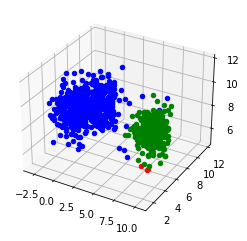

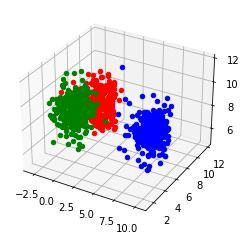

In [13]:
def single_HC(data_show,list_output):   #画图
    labels_after=np.zeros(sample_size)
    type_clu_of_sample=0
    for item in list_output:
        for i in item.list_num:
            labels_after[i]=type_clu_of_sample
        type_clu_of_sample+=1
    draw_distribution(data_show,labels_after)
single_HC(data,list_output_1)
single_HC(data,list_output_2)
        

label_set_before=np.empty(sample_size)
for item in np.arange(sample_size):
    label_set_before[item]=np.inf

C:\Users\32068\AppData\Local\Temp/ipykernel_20312/2335485301.py:12: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  c=color[np.int(label_show[item])]


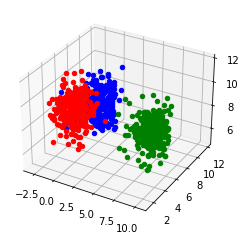

In [14]:
#使用max进行计算
def cluster_data_max(class_to,distance_matrix,label_array_before,init_class,):
    distance=copy.deepcopy(distance_matrix)
    label_array=copy.deepcopy(label_array_before)
    #print(distance)
    cluster_list=[]
    class_num=class_to
    record=0        
    while(1):
        row,col=indmin_matrix(distance)
        #distance[row][col]=np.inf
        #distance[col][row]=np.inf
        #print(row,col)
        if label_array[row]==np.inf and label_array[col]==np.inf:
            #print("case 1")
            cluster=cluster_type([row,col],type_c=record)
            cluster_list.append(cluster)
            label_array[row],label_array[col]=record,record
        elif label_array[row]!=np.inf and label_array[col]!=np.inf:
            #print("case 2")
            col1=get_index_of_cluster(row,cluster_list)
            col2=get_index_of_cluster(col,cluster_list)
            cluster_list[col1].merge(cluster_list[col2])
            del cluster_list[col2]
            label_array[row]=label_array[col]
        elif label_array[row]==np.inf and label_array[col]!=np.inf:#row需要并入
            #print("case 3")
            col2=get_index_of_cluster(col,cluster_list)
            #print(col2)
            cluster_list[col2].append(row)
            label_array[row]=label_array[col]
        elif label_array[col]==np.inf and label_array[row]!=np.inf:#col并入
            #print("case 4")
            col2=get_index_of_cluster(row,cluster_list)
           # print(row)
           # print(col2)
            cluster_list[col2].append(col)
            label_array[col]=label_array[row]
        record+=1
        #print(cluster_list)
        for iter_item in cluster_list: #需要被删除的项
            mat=[]
        #print(cluster_list[0].list)
            for item in iter_item.list_num:
                mat.append(distance[item])
            for i in np.arange(len(iter_item.list_num)):
                for j in  range(i,len(iter_item.list_num)):
                    distance[iter_item.list_num[i]][iter_item.list_num[j]]=100000
                    distance[iter_item.list_num[j]][iter_item.list_num[i]]=100000
            arg_list=np.max(mat,axis=0)
            #print(arg_list)
            for item in iter_item.list_num:
             #   print(item)
             #   print(distance)
                distance[item]=arg_list
        init_class=init_class-1
        #print(len(cluster_list))
        #print(init_class)
        if(init_class<100 and len(cluster_list)==class_to-1 ):
            
            break
    return cluster_list

list_output_max=cluster_data_max(4,distance,label_set_before,sample_size-1)
#for item in list_output_max:
    #print(item.list_num)
single_HC(data,list_output_max)



def cluster_data_average(class_to,distance_matrix,label_array,init_class,):
    distance=distance_matrix
    #print(distance)
    cluster_list=[]
    class_num=class_to
    record=0
    while(class_num<init_class):
        row,col=indmin_matrix(distance)
       # print(row,col)
        if label_array[row]==np.inf and label_array[col]==np.inf:
            #print("case 1")
            cluster=cluster_type([row,col],type_c=record)
            cluster_list.append(cluster)
            label_array[row],label_array[col]=record,record
        elif label_array[row]!=np.inf and label_array[col]!=np.inf:
            #print("case 2")
            col1=get_index_of_cluster(row,cluster_list)
            col2=get_index_of_cluster(col,cluster_list)
            cluster_list[col1].merge(cluster_list[col2])
            del cluster_list[col2]
            label_array[row]=label_array[col]
        elif label_array[row]==np.inf and label_array[col]!=np.inf:#row需要并入
            #print("case 3")
            col2=get_index_of_cluster(col,cluster_list)
            #print(col2)
            cluster_list[col2].append(row)
            label_array[row]=label_array[col]
        elif label_array[col]==np.inf and label_array[row]!=np.inf:#col并入
            #print("case 4")
            col2=get_index_of_cluster(row,cluster_list)
           # print(row)
           # print(col2)
            cluster_list[col2].append(col)
            label_array[col]=label_array[row]
        record+=1
        #print(cluster_list)
        for iter_item in cluster_list: #需要被删除的项
            mat=[]
        #print(cluster_list[0].list)
            for item in iter_item.list_num:
                mat.append(distance[item])
            for i in np.arange(len(iter_item.list_num)):
                for j in  range(i,len(iter_item.list_num)):
                    distance[iter_item.list_num[i]][iter_item.list_num[j]]=100000
                    distance[iter_item.list_num[j]][iter_item.list_num[i]]=100000
            arg_list=np.mean(mat,axis=0)
            #print(arg_list)
            for item in iter_item.list_num:
             #   print(item)
             #   print(distance)
                distance[item]=arg_list
        #distance=up_date_distance(distance,cluster_list)
        init_class=init_class-1
        print(len(cluster_list))
        #print(init_class)
        if(init_class<100 and len(cluster_list)==class_to-1 ):
            break
    return cluster_list
list_output_mean=cluster_data_average(4,distance,label_set_before,sample_size)
single_HC(data,list_output_mean)

In [15]:
def get_acc(list_clu,cat_num=3):
    acc=0
    for item in list_clu:
        
        counter_cat=np.zeros(cat_num)
        #print( sorted(item.list_num))
        for num in sorted(item.list_num):
            #print(num)
            counter_cat[label[num]]+=1
        #print(counter_cat)
        acc+=np.max(counter_cat)
    print(acc/sample_size)
#print(label)

get_acc(list_output_1,3)
get_acc(list_output_2,3)
get_acc(list_output_max,3)


0.66
0.98
0.98625
